# Atividade 7 - Métricas, Features e Rede Neural Simple

Neste Notebook, será abordado as principais métricas de avaliação (**accuracy**, **precision**, **recall** e **F1-score**), apresentando exemplos práticos com matrizes de confusão e análises críticas. Além disso, integraremos os códigos e figuras dos notebooks indicados para uma compreensão do tema.

## Accuracy (Acurácia)

A acurácia mede a proporção de previsões corretas feitas pelo modelo, ou seja, a fração de amostras classificadas corretamente entre todas as previsões.

$$ Accuracy = \frac{TP + TN} {TP + TN + FP + FM} $$

### Vantagens
 * Funciona bem quando há uma distribuição equilibrada entre classes.
 * Fácil de interpretar.

In [1]:
import pandas as pd

# Criação da matriz de confusão
cm = pd.DataFrame([[50, 10],
                   [5, 35]],
                  index=["Classe Positiva", "Classe Negativa"],
                  columns=["Predito Positivo", "Predito Negativo"])
cm

Predito Positivo  Predito Negativo
Classe Positiva                50                10
Classe Negativa                 5                35

In [2]:
# Extraindo os valores
TP = cm.iloc[0, 0]
FP = cm.iloc[0, 1]
FN = cm.iloc[1, 0]
TN = cm.iloc[1, 1]

print("TP:", TP, "FP:", FP, "FN:", FN, "TN:", TN)

TP: 50 FP: 10 FN: 5 TN: 35


In [3]:
# Cálculo da Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 85.00%


### Desvantagens
* Não é confiável em dados desbalanceados. Exemplo: se 95% dos dados pertencem à classe negativa, um modelo que prevê sempre "Negativo" terá 95% de acurácia, mas será inútil.

In [4]:
# Matriz de confusão em um cenário desbalanceado
cm_ruim = pd.DataFrame([[5, 45],
                        [0, 50]],
                       index=["Classe Positiva", "Classe Negativa"],
                       columns=["Predito Positivo", "Predito Negativo"])
print("Matriz de Confusão - Cenário Desbalanceado:")
cm_ruim


Matriz de Confusão - Cenário Desbalanceado:


Predito Positivo  Predito Negativo
Classe Positiva                 5                45
Classe Negativa                 0                50

In [5]:
# Extraindo os valores
TP_ruim = cm_ruim.iloc[0, 0]
FP_ruim = cm_ruim.iloc[0, 1]
FN_ruim = cm_ruim.iloc[1, 0]
TN_ruim = cm_ruim.iloc[1, 1]

print("TP:", TP_ruim, "FP:", FP_ruim, "FN:", FN_ruim, "TN:", TN_ruim)

TP: 5 FP: 45 FN: 0 TN: 50


In [6]:
accuracy_ruim = (TP_ruim + TN_ruim) / (TP_ruim + TN_ruim + FP_ruim + FN_ruim)
print(f"Accuracy (cenário desbalanceado): {accuracy_ruim * 100:.2f}%")

Accuracy (cenário desbalanceado): 55.00%


## Precision (Precisão)

A precisão mede a fração de previsões positivas que realmente pertencem à classe positiva. Ou seja, entre todos os exemplos que o modelo previu como positivos, quantos eram realmente positivos?

$$ Precision = \frac{TP} {TP + FP} $$

### Vantagens: 
* **Boa métrica quando os falsos positivos são mais problemáticos.**
    * Exemplo: Diagnóstico de câncer. Se um teste classifica uma pessoa saudável como doente (FP), isso pode levar a exames desnecessários.

In [7]:
precision = (TP / (TP + FP))
print(f"Precisão: {precision * 100:.2f}%")

Precisão: 83.33%


### Desvantagem:
* Pode ignorar os **falsos negativos**, ou seja, pode falhar em capturar **todas** as ocorrências positivas.

In [8]:
precision_ruim = (TP_ruim / (TP_ruim + FP_ruim))
print(f"Precisão (classes desbalanceadas: {precision_ruim * 100:.2f}%")

Precisão (classes desbalanceadas: 10.00%


## Recall

A **revocação** mede a fração de exemplos positivos corretamente identificados pelo modelo. Ou seja, **entre todos os exemplos que realmente são positivos, quantos o modelo conseguiu encontrar?**

$$ Recall = \frac{TP} {TP + FN} $$

In [9]:
recall = TP / (TP + FN)
print(f"Recall (sensibilidade): {recall * 100:.2f}%")

Recall (sensibilidade): 90.91%


### Vantagens:
* Útil quando os **falsos negativos são mais problemáticos**.
    * Exemplo: Um exame de câncer deve detectar todos os casos reais de câncer (FN baixos), mesmo que gere alguns falsos positivos.

### Desvantagem:
* Um modelo pode ter **recall alto** apenas prevendo **tudo como positivo**, mas isso não significa que seja preciso.

In [10]:
recall_ruim = TP_ruim / (TP_ruim + FN_ruim)
print(f"Recall (sensibilidade): {recall_ruim * 100:.2f}")

Recall (sensibilidade): 100.00


## F1-score (Sensibilidade)

O **F1-score** é a **média harmônica** entre precisão e recall. Ele é útil quando há um **desequilíbrio entre as classes** e queremos um **compromisso entre precisão e recall**.

$$ \textit{F1-score} = 2 \times \frac{Precision \times Recall} {Precision + Recall} $$

### Vantagens:
* Indicado para dados desbalanceados.
* Equilibra precisão e recall.


In [11]:
f1_score = 2 * (precision * recall) / (precision + recall)
print(f"F1-score: {f1_score * 100:.2f}%")

F1-score: 86.96%


### Desvantagem:
* Pode ser difícil de interpretar diretamente.

In [12]:
f1_score_ruim = 2 * (precision_ruim * recall_ruim) / (precision_ruim + recall_ruim)
print(f"F1-score: {f1_score_ruim * 100:.2f}%")

F1-score: 18.18%


## Especificidade

A **especificidade** mede a capacidade do modelo de prever corretamente os exemplos negativos. Ou seja, entre todos os exemplos que realmente pertencem à classe negativa, quantos foram corretamente identificados como negativos?

$$ \text{Specificity} = \frac{TN} {TN + FP} $$

In [13]:
specificity = TN / (TN + FP)
print(f'Especificidade: {specificity * 100:.2f}% ')

Especificidade: 77.78% 


# Explicação das figuras Iris

In [2]:
from IPython.display import Image

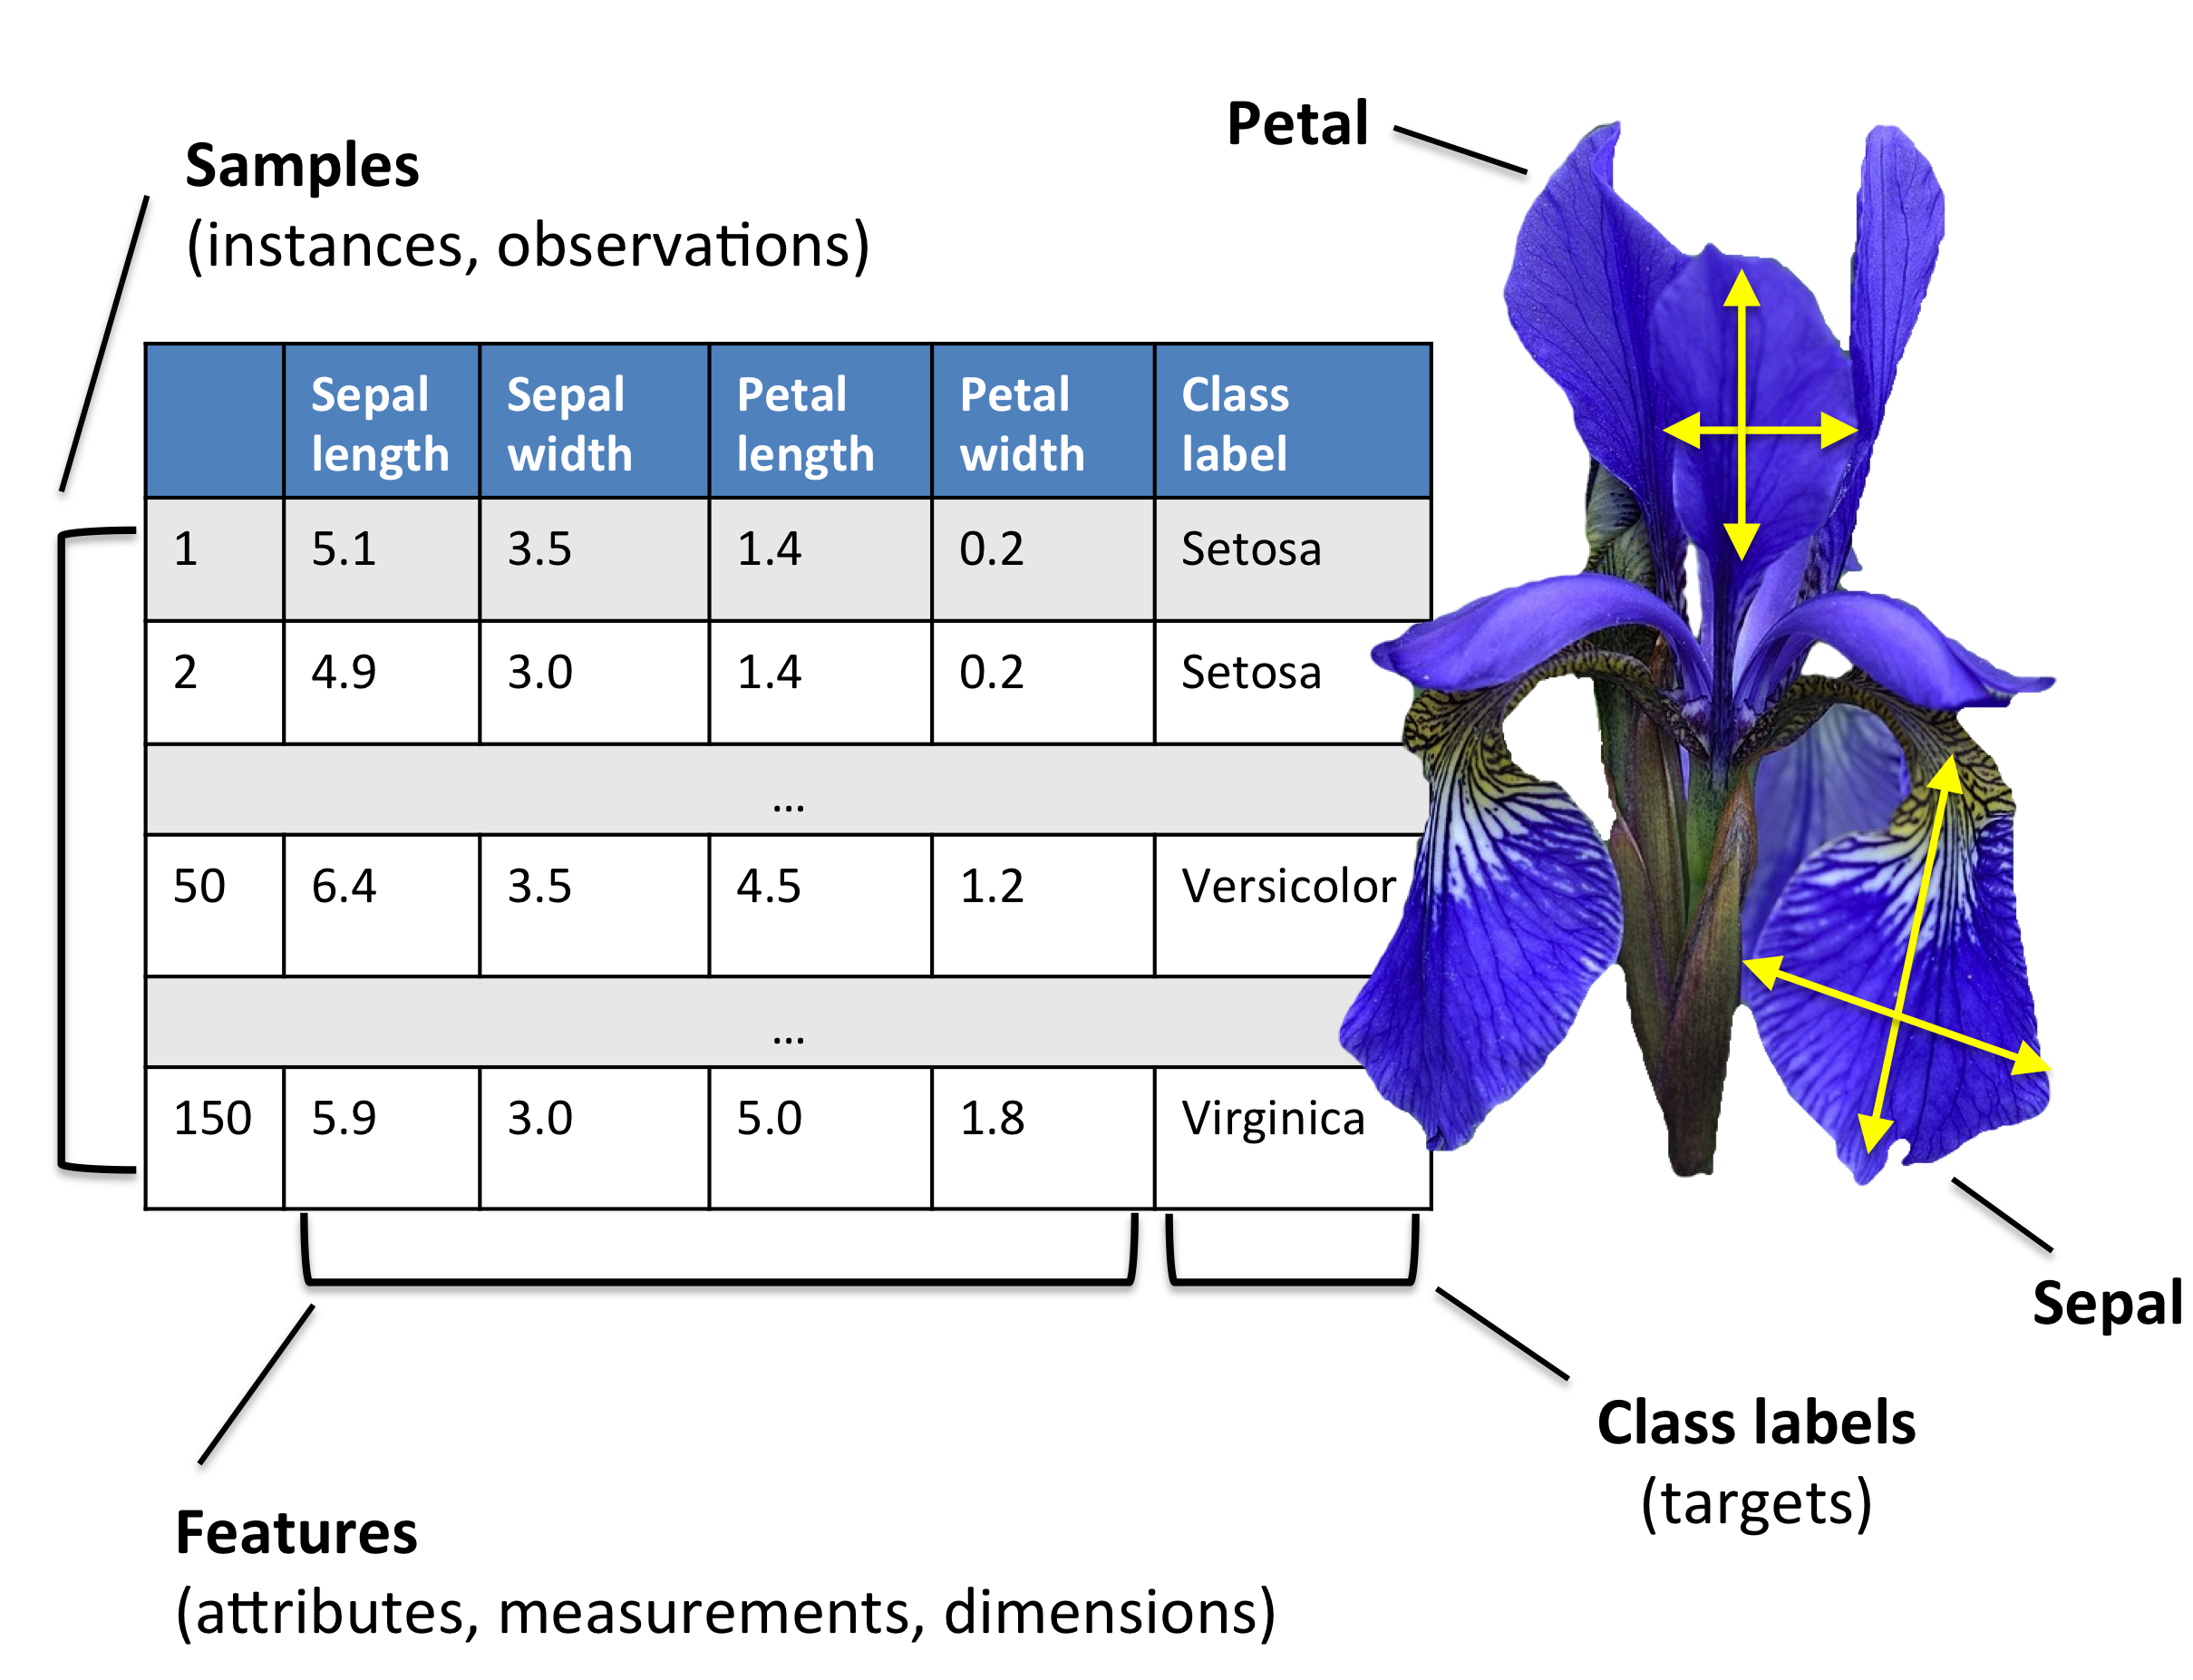

In [3]:
Image(filename='./images/01_08.png', width=800) 

O conjunto de dados Íris foi coletado para fins de estudos tanto para aprendizado de máquina como para estudos em estatística. Nela, possui as características que compõem a flor Íris e seus respectivos tipos, ou seja, as espécies. As características **(features)** são: comprimento e largura das sépalas e pétalas. Os tipos das flores, presentes na **class label** na figura, são classificados em tipos, que são: Setosa, Versicolor e Vírginia. Neste *dataset* são registradas 150 amostras (**instances**).

In [4]:
Image(filename='./images/01_09.png', width=800) 

Na Figura acima, é a demonstração do processo que inclui, separação da base de dados para treinamento e teste, aprendizado do modelo, avaliação e por fim testar o modelo com os novos dados. 
Na parte de *preprocessing* é trabalho as seleções das melhores *features*. Além disso, conforme a quantidade de dados, são divididos em treino e teste. Em seguinda, 